In [16]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import ndimage
import random
from scipy.optimize import leastsq
from scipy import ndimage
from scipy.optimize import least_squares
from func import *
from scipy import stats
from matplotlib.colors import LogNorm
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
kernel = Gaussian2DKernel(x_stddev=1)
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.weight'] = 'light'

In [2]:
(x_BH,y_BH)=(49.6491,49.8141)

xmin = - x_BH*0.2 - 0.5*0.2
xmax = 0.2*(100 - x_BH) + 0.5*0.2
ymin = - y_BH*0.2 - 0.5*0.2
ymax = 0.2*(100 - y_BH) + 0.5*0.2

In [3]:
hdu = fits.open('/Volumes/Seagate/HE0040-1105 Extended/subcube_par_HE0040-1105_extended_single_gauss.fits')
amp_OIII_br = hdu[6].data
amp_OIII = hdu[2].data
amp_Hb = hdu[1].data
vel_OIII = hdu[3].data
vel_sigma_OIII = hdu[4].data
vel_OIII_br = hdu[7].data
vel_sigma_OIII_br = hdu[8].data
hdu.close()


In [4]:
r = amp_OIII/amp_Hb

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


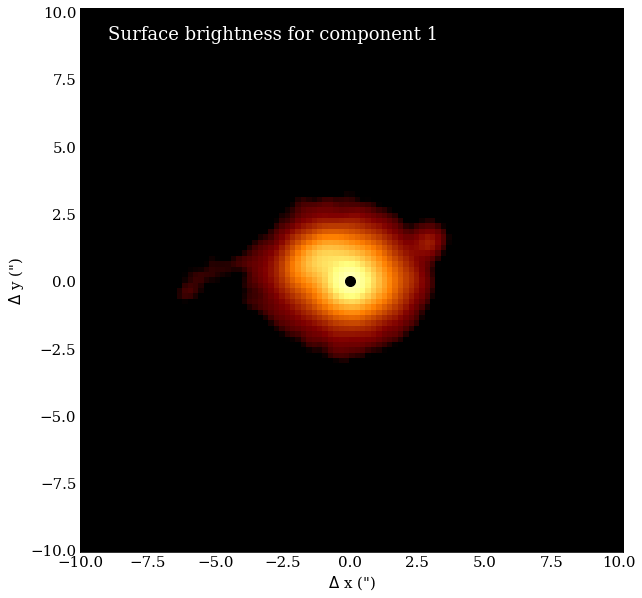

In [17]:
amp_OIII[amp_OIII>10]=1e-15
amp_OIII[amp_OIII<7e-3]=1e-15
amp_OIII[amp_OIII==0]=1e-15

scipy_conv = scipy_convolve(amp_OIII, kernel, mode='same', method='direct')

#astropy_conv = convolve(amp_OIII_br, kernel)

fig = plt.figure(figsize=(10,10))
plt.imshow(scipy_conv/np.max(scipy_conv),origin='lower',interpolation='nearest',cmap='afmhot',extent=[xmin,xmax,ymin,ymax],vmin=0.001,vmax=3,norm=LogNorm())
plt.plot(0,0,'ko',ms=10)
plt.text(-9,9,'Surface brightness for component 1',color='w',fontsize=18)

plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
fig.savefig('/Volumes/Seagate/HE0040-1105 Extended/Intensity map Comp1 Gauss1.png',overwrite=True)

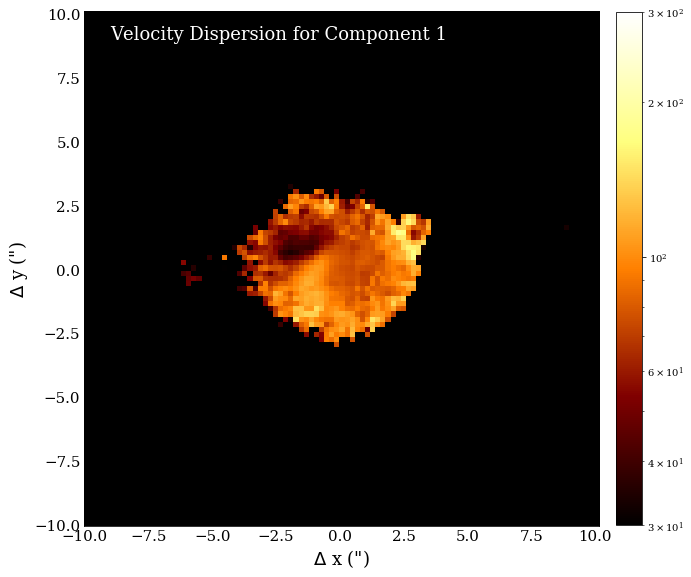

In [34]:
m1 = np.ma.masked_greater(amp_OIII,3)
m2 = np.ma.masked_less(m1,5e-3)

fig = plt.figure(figsize=(10,10))
plt.imshow(m2,origin='lower',interpolation='nearest',norm=LogNorm(),cmap='afmhot')

m_mask = np.ma.getmask(m2)
masked_array = np.ma.masked_array(vel_sigma_OIII, mask=m_mask)

inarray=np.where(masked_array.mask,1e-15,masked_array) # masking still doesn't work, has to set to numpy.nan
result=convolve(inarray,kernel)

scipy_conv = scipy_convolve(masked_array, kernel, mode='same', method='direct')
plt.imshow(result,origin='lower',interpolation='nearest',extent=[xmin,xmax,ymin,ymax],vmin=30,vmax=300,cmap='afmhot',norm=LogNorm())
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
#plt.plot(0,0,'ko',ms=10,label='Central engine')
plt.text(-9,9,'Velocity Dispersion for Component 1',color='w',fontsize=18)

plt.xlabel(r'$\Delta$ x (")',fontsize=18)
plt.ylabel(r'$\Delta$ y (")',fontsize=18)
plt.colorbar(fraction=0.046,pad=0.03)
fig.savefig('/Volumes/Seagate/HE0040-1105 Extended/Velocity dispersion map Comp1 Gauss1.png',overwrite=True)

In [35]:
c = 300000
z = 0.04196
vel_rest = 12568
vel_OIII_new = vel_OIII - vel_rest

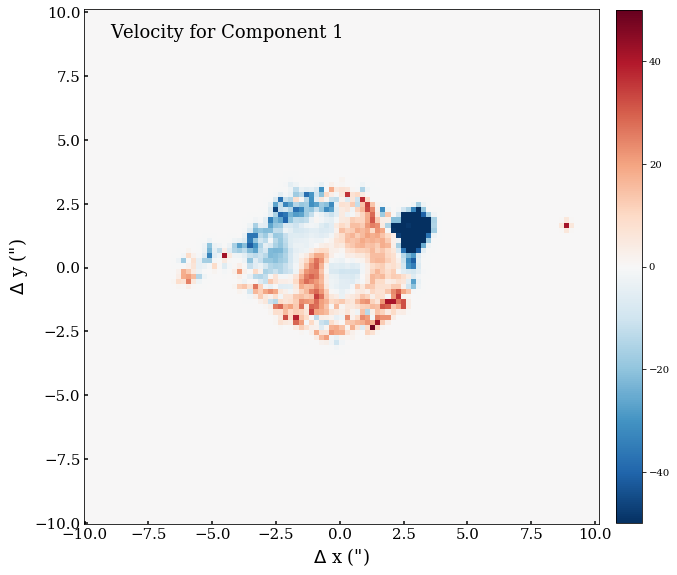

In [36]:
m1 = np.ma.masked_greater(amp_OIII,3)
m2 = np.ma.masked_less(m1,7e-3)

fig = plt.figure(figsize=(10,10))
plt.imshow(m2,origin='lower',interpolation='nearest',norm=LogNorm(),cmap='afmhot')

m_mask = np.ma.getmask(m2)
masked_array = np.ma.masked_array(vel_OIII_new, mask=m_mask)

inarray=np.where(masked_array.mask,0,masked_array) # masking still doesn't work, has to set to numpy.nan
result=convolve(inarray,kernel)

scipy_conv = scipy_convolve(masked_array, kernel, mode='same', method='direct')
plt.imshow(result,origin='lower',interpolation='nearest',extent=[xmin,xmax,ymin,ymax],vmin=-50,vmax=50,cmap='RdBu_r')
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
#plt.plot(0,0,'ko',ms=10,label='Central engine')
plt.text(-9,9,'Velocity for Component 1',color='k',fontsize=18)

plt.xlabel(r'$\Delta$ x (")',fontsize=18)
plt.ylabel(r'$\Delta$ y (")',fontsize=18)
plt.colorbar(fraction=0.046,pad=0.03)
fig.savefig('/Volumes/Seagate/HE0040-1105 Extended/Velocity map Comp1 Gauss1.png',overwrite=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


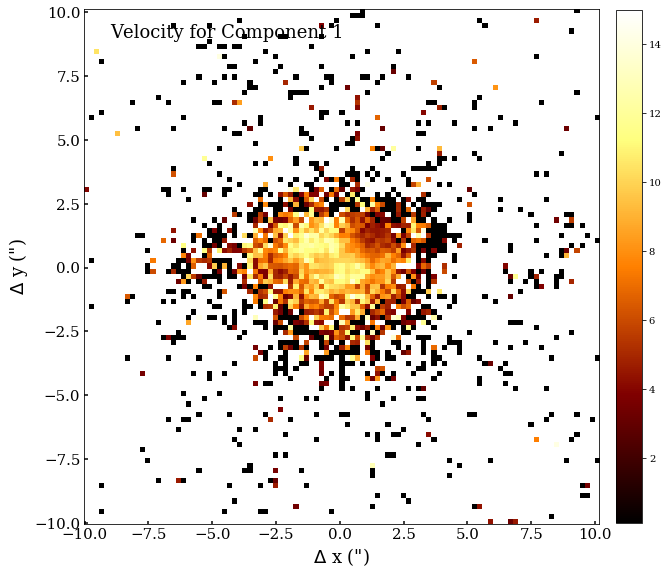

In [22]:
m1 = np.ma.masked_greater(amp_OIII,3)
m2 = np.ma.masked_less(m1,7e-3)

fig = plt.figure(figsize=(10,10))
plt.imshow(m2,origin='lower',interpolation='nearest',norm=LogNorm(),cmap='afmhot')

r[r>30] = 1e-15
r[r<3] = 1e-15

m_mask = np.ma.getmask(m2)
masked_array = np.ma.masked_array(r, mask=m_mask)

inarray=np.where(masked_array.mask,0,masked_array) # masking still doesn't work, has to set to numpy.nan
result=convolve(inarray,kernel)

scipy_conv = scipy_convolve(masked_array, kernel, mode='same', method='direct')
plt.imshow(r,origin='lower',interpolation='nearest',extent=[xmin,xmax,ymin,ymax],vmin=0.1,vmax=15,cmap='afmhot')
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
#plt.plot(0,0,'ko',ms=10,label='Central engine')
plt.text(-9,9,'Velocity for Component 1',color='k',fontsize=18)

plt.xlabel(r'$\Delta$ x (")',fontsize=18)
plt.ylabel(r'$\Delta$ y (")',fontsize=18)
plt.colorbar(fraction=0.046,pad=0.03)
fig.savefig('/Volumes/Seagate/HE0040-1105 Extended/OIII to Hb ratio Gauss1.png',overwrite=True)